# Part A
Build a baseline model (5 marks). Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_split helper function from Scikit-learn.
2. Train the model on the training data using 50 epochs.
3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.
4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.
5. Report the mean and the standard deviation of the mean squared errors.

## Overall Findings
<div class="alert alert-block alert-info" style="margin-top: 20px">

### Summary of mean and standard deviation of MSE 

|            *              |  Part A  |  Part B  |  Part C  |  Part D  |
|---------------------------|----------|----------|----------|----------|
| Mean of MSE               | 265.3690   | 904.2639    | 630.1834  | 321.6400 |
| Standard Deviation of MSE | 169.2189  | 362.2746   | 461.4690 | 357.9270 |
    


Mean and standard deviation of MSE for the model built in Part A are 265. 37 and 169.22 respectively - lower than those found in Parts B, C and D.

</div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
#Check number of data points
concrete_data.shape

(1030, 9)

In [4]:
#Statistical description of data
concrete_data.describe()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
#Split data into predictors & target
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [6]:
#Check Predictors
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
#Check target
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [8]:
#number of predictors
ncols = predictors.shape[1] 

## 1. Randomly split the data into a training (70%) & test set (30%)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

## 2. Compute the mean squared error between the predicted and actual concrete strength. 
Here, Keras backend was used to calculate mean_squared_error at the end of each batch/epoch

In [10]:
#Compute the mean squared error between the predicted and actual concrete strength
import keras.backend as K

def mse(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred))

Using TensorFlow backend.


## 3. Build a neural network with:
- Hidden Layer: 1
- Nodes in hidden layer: 10
- Activation function: ReLU
- Optimizer: adam
- Loss Function: mean squared error

In [11]:
#Build a Neural Network
import keras
from keras.models import Sequential
from keras.layers import Dense

# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(ncols,)))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[mse])
    return model

In [12]:
# build the model
model = regression_model()

Instructions for updating:
Colocations handled automatically by placer.


## 4. Model training and Evaluation
Train the model on the the training data using 50 epochs. Evaluate the model on the test data 

In [13]:
# fit the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 2s - loss: 2438.1230 - mse: 2438.1230 - val_loss: 1193.5552 - val_mse: 1193.5552
Epoch 2/50
 - 1s - loss: 1165.7666 - mse: 1165.7666 - val_loss: 717.7578 - val_mse: 717.7578
Epoch 3/50
 - 1s - loss: 740.8171 - mse: 740.8171 - val_loss: 521.5794 - val_mse: 521.5794
Epoch 4/50
 - 2s - loss: 577.7057 - mse: 577.7057 - val_loss: 428.1053 - val_mse: 428.1053
Epoch 5/50
 - 2s - loss: 484.2822 - mse: 484.2822 - val_loss: 381.8312 - val_mse: 381.8312
Epoch 6/50
 - 5s - loss: 428.7229 - mse: 428.7229 - val_loss: 358.9429 - val_mse: 358.9429
Epoch 7/50
 - 5s - loss: 397.7924 - mse: 397.7924 - val_loss: 339.9032 - val_mse: 339.9032
Epoch 8/50
 - 1s - loss: 374.6585 - mse: 374.6585 - val_loss: 326.8832 - val_mse: 326.8832
Epoch 9/50
 - 1s - loss: 357.6180 - mse: 357.6180 - val_loss: 316.8081 - val_mse: 316.8081
Epoch 10/50
 - 1s - loss: 344.0918 - mse: 344.0918 - val_loss: 306.8536 - val_mse

## 5. Model Evaluation
Evaluate the model on the test data. 

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \nError: {}".format(score[1], 1-score[1]))

Accuracy: 139.27795131152502 
Error: -138.27795131152502


## 6. Report the mean and standard deviation of the Mean Squared Errors (MSE)

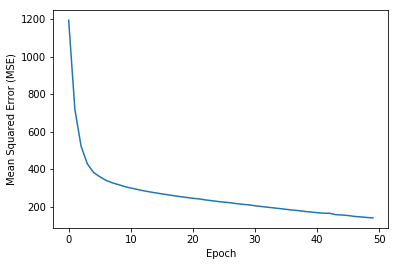

In [18]:
from matplotlib import pyplot
pyplot.plot(hist.history['val_mse'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Mean Squared Error (MSE)')

pyplot.show()

In [17]:
import statistics
mse_mean = statistics.mean(hist.history['val_mse'])
mse_stdev = statistics.stdev(hist.history['val_mse'])

print("Mean of MSE: {:.4f} \nStandard Deviation of MSE: {:.4f}".format(mse_mean, mse_stdev))

Mean of MSE: 265.3690 
Standard Deviation of MSE: 169.2189


## Overall Findings

<div class="alert alert-block alert-info" style="margin-top: 20px">

### Summary of mean and standard deviation of MSE 

|            *              |  Part A  |  Part B  |  Part C  |  Part D  |
|---------------------------|----------|----------|----------|----------|
| Mean of MSE               | 265.3690   | 904.2639    | 630.1834  | 321.6400 |
| Standard Deviation of MSE | 169.2189  | 362.2746   | 461.4690 | 357.9270 |
    
</div>